# 기본통계
## 목차 
1. [대표값](#대표값)
1. [산포도](#산포도)
1. [정규분포](#정규분포)
1. [중심극한정리](#중심극한정리)
1. [스튜던트t분포](#스튜던트t분포)

## 대표값
자료 전체의 특징이나 경향을 하나의 수로 나타낸 값
* 평균(mean)  
  산술평균, 전체 데이터 합을 개수로 나눈값

In [3]:
from statistics import *
mean([1,2,3,4,5])

3

* 중앙값(median)  
numeric 데이터의 중간 값, 데이터 포인트의 개수가 홀수일 경우에는 중앙의 값이며 짝수일 경우에는 두 중앙 값의 평균으로 계산한다. 만약 데이터가 ordinal이면 median_low(), median_high()를 써야한다. 

In [5]:
median([1,3,5])

3

In [4]:
median([1,3,5,7])

4.0

* 최빈값(mode)  
  discrete 데이터에서 가장 common 값

In [6]:
mode([1,1,2,3,3,3,4])

3

#### Numpy 사용 예제

In [22]:
import numpy as np
from scipy import stats
a = np.array([[1,3,4,2,2,7],
             [5,2,2,1,4,1],
             [3,3,2,2,1,1]])
m = np.mean(a)
print("mean : {}".format(m))
m = np.mean(a, axis=0)
print("mean axis=0 : {}".format(m))
m = np.mean(a, axis=1)
print("mean axis=1 : {}".format(m))
m = np.median(a)
print("median : {}".format(m))
m = np.median(a, axis=0)
print("median axis=0 : {}".format(m))
m = np.median(a, axis=1)
print("median axis=1 : {}".format(m))
m = stats.mode(a)
print("mode : {}".format(m))


mean : 2.5555555555555554
mean axis=0 : [3.         2.66666667 2.66666667 1.66666667 2.33333333 3.        ]
mean axis=1 : [3.16666667 2.5        2.        ]
median : 2.0
median axis=0 : [3. 3. 2. 2. 2. 1.]
median axis=1 : [2.5 2.  2. ]
mode : ModeResult(mode=array([[1, 3, 2, 2, 1, 1]]), count=array([[1, 2, 2, 2, 1, 2]]))


## 산포도
자료의 흩어진 정도
1. 분산: 개별 관측치와 평균의 차이의 제곱의 평균
2. 표준편차: 분산에 제곱근을 구하여 원래 측정값들의 차수에 맞추어 준 것
3. 범위 : 가장 큰 값과 가장 작은 값 간의 차이. 특별히 큰 값이나 작은 값이 있으면 부적합
4. 사분위

## 정규분포
정규분포(Normal Distribution)는 하나의 꼭지를 가진 완벽한 좌우대칭으로 양꼬리 부분에는 자료가 거의 존재하지 않으며, 모든 정규분포는 평균(mu)와 표준편차(variance)에 의해 결정된다. 즉 정규분포를 띠는 자료라면 내용이 어떻든지 간에 평균과 표준편차만 같다면 모두 동일한 정규분포(N(mu, sigma))가 됨. 평균이 0이고 표준편차가 1인 정규분포를 **표준정규분포(Standard normal distribution)**, 혹은 z-분포라고 한다. 어떤 집단이 정규분포를 따른다고 가정하고 그 평균을 비교하는 것이 **z-검정** 이다.

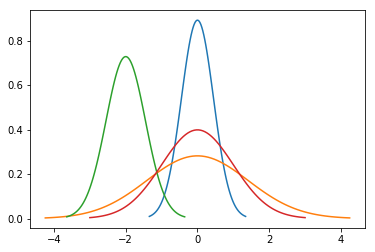

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def plot_normal_distribution(mu=0, variance=1):
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
plot_normal_distribution(0, 0.2)
plot_normal_distribution(0, 2)
plot_normal_distribution(-2, 0.3)
# standard normal distribution
plot_normal_distribution()
plt.show()

## 중심극한정리
통계모형들은 자료가 정규분포라는 가정에 기초하여 발달됨. 모집단으로부터 무작위로 표본을 추출할 때 표본의 크기가 충분히 크다면 표본 변수들의 그 합 또는 평균의 히스토그램은 정규분포 곡선에 수렴하여 이를 중심극한정리(Central limit theorem) 이라고 한다. 모집단의 구성에 관계없이 항상 성립하며 히스토그램을 정규분포 곡선으로 가깝게 하는데 필요한 최소한의 추출 횟수는 모집단의 분포에 따라 달라진다.

모집단의 분포를 알지 못하는 경우에도 표본수가 충분히 크다면 중심극한정리에 의해 표본평균의 분포는 정규성을 띤다고 가정할 수 있으며, 이러한 정규성 가정을 통해 군간의 크기를 비교하기 쉬워짐

<IPython.core.display.Javascript object>


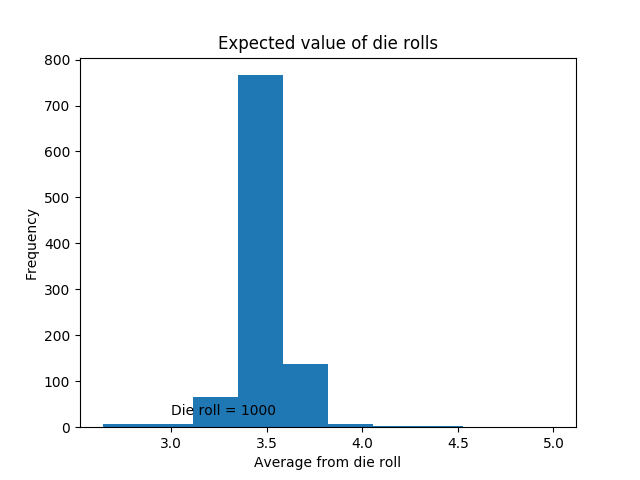

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
# 1000 simulations of die roll
n = 1000

# In each simulation, there is one trial more than the previous simulation
avg = []
for i in range(2, n):
    a = np.random.randint(1,7,i)
    avg.append(np.average(a))
    
# Function that will plot the histogram, where currnt is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == 1000:
        a.event_source.stop()
    
    plt.hist(avg[0:current])
    
    plt.gca().set_title('Expected value of die rolls')
    plt.gca().set_xlabel('Average from die roll')
    plt.gca().set_ylabel('Frequency')
    
    plt.annotate('Die roll = {}'.format(current), [3, 27])

fig = plt.figure("Central limit theorem")
a = animation.FuncAnimation(fig, clt, interval=1)

In [61]:
# Save the animation as a gif
a.save('clt.gif', writer='imagemagick', fps=10)

## 스튜던트t분포
t분포 (Student's t-distribution)은 모집단이 정규분포를 하더라도 분산이 알려져 있지 않고 표본의 수가 적은 경우에 평균에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰인다.

t 분포의 특성
1. t 분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
1. t 분포의 꼬리는 표준정규분포보다 두껍나(fat tail).
1. t 분포는 자유도(degree of freedom) df에 따라 모습이 변하는데, 자유도 n이 커짐에 따라 표준정규분포 N(0, 1)에 수렴한다.

통계적 추론에서 통상 모집단의 분산이 알려져 있지 않은 경우, 표본분포를 결정할 때 표본의 크기가 30 이하면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용한다.


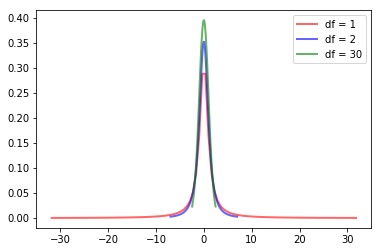

In [53]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

def plot_t_distribution(df=1, color='r-'):
    x= np.linspace(t.ppf(0.01, df), t.ppf(0.99,df), 100)
    plt.plot(x, t.pdf(x, df), color, lw=2, alpha=0.6, label="df = {}".format(df))
    plt.legend()
plot_t_distribution()
plot_t_distribution(2,'b')
plot_t_distribution(30, 'g')
plt.show()